In [2]:
import pandas as pd
import yfinance as yf

### Problem 1
We consider the situation studied in class as an example. Namely, we assume that the
current stock price is $S_0 = 10$. At time $T$, the stock has either moved up to $S_T = 12$ (with
probability $p = 0.6$) or down towards $S_T = 8$ (with probability $1−p = 0.4$). We consider
a call option on this stock with maturity $T$ and strike price $K = 10$. The interest rate on
the money market is zero. <p>
As in class, we assume that you, as a customer, are willing to buy the call option on
100 shares of stock for $120. The investor, who sold you the option, can adopt one of the
following strategies:

- **Strategy 1**: (seen in class) Buy 50 shares of stock and borrow $380.
    
- **Strategy 2**: Buy 55 shares of stock and borrow $430.

- **Strategy 3**: Buy 60 shares of stock and borrow $480.
    
- **Strategy 4**: Buy 40 shares of stock and borrow $280.

(a) For each of strategies 2-4, describe the value of the investor’s portfolio at time 0,
and at time T for each possible movement of the stock. 

- **Strategy 2**: 

$f_{+}= 55(12) +430 = 1090$

$f_{-}=55(8) +430 = 870 $

$\pi _{v,0} = 55(10) + 430 = 980$

- **Strategy 3**: 
    
$f_{+}= 60(12) +480 = 1200$

$f_{-}=60(8) + 480 = 960$

$\pi _{v,0} = 60(10) + 480 = 1080$

- **Strategy 4**: 

$f_{+}=40(12) +280 = 760$

$f_{-}=40(8) + 280 = 600$

$\pi _{v,0} = 40(10) + 280 = 680$

(b) For each of strategies 2-4, does the investor have an arbitrage ? Reminder: an
arbitrage is an opportunity to obtain a positive profit without risk. 

- **Strategy 2**: Yes, 10 dollar arb regardless of up or down 

- **Strategy 3**: Yes, 40 dollar arb in the up, zero gain in the down
    
- **Strategy 4**: Yes, zero gain in the up, zero 40 arb in the down

(c) If you were the investor, which strategy would you adopt and why ? (This is an
open question without a right or wrong answer. Feel free to elaborate.) 

I'm choosing strat 1 or 2 because there is an arb in both the up and the down case

### Problem 2

We consider a market with the following properties: the current stock price is $S_0 = 4$.
At time T = 1 year, the stock has either moved up to $S_1 = 8$ (with probability 0.7) or
down towards $S_1 = 2$ (with probability 0.3). We consider a call option on this stock with
maturity $T = 1$ and strike price $K = 5$. The interest rate on the money market is 25%
yearly.

(a) Find the replicating portfolio ($\phi,\psi$) corresponding to this call option. 

$$\phi = \frac{3-0}{8-2} = \frac{1}{2}$$
$$\psi = \frac{0-(0.5)*2}{1+.25} = \frac{-1}{1.25} = \frac{-4}{5}$$

(b) Find the risk-neutral (no-arbitrage) price of this call option.

$$v_0 = 4(\frac{1}{2})+\frac{-4}{3}=1.2$$

(c) We now consider a put option with maturity $T = 1$ and strike price $K = 3$ on
the same market. Find the risk-neutral price of this put option. Reminder: A put
option gives you the right to sell the stock for the strike price K.

$$\psi = \frac{1-0}{2-8}=\frac{-1}{6}$$
$$\frac{-1}{6}(2)+\phi(1.25) = 1 \to \phi = \frac{4}{3}\frac{4}{5} = \frac{16}{15}$$
$$v_0 = \frac{-1}{6}(4) + \frac{16}{15} = \frac{6}{15}$$


(d) An investor with initial capital $X_0 = 0$ wants to invest on this market. He buys
α shares of the stock (or sells them if α is negative) and buys $\beta$ call options (or
sells them is $\beta$ is negative). He invests the cash balance on the money market (or
borrows if the amount is negative).

Prove that if the option price is the one found in (a), then the investor will never
have an arbitrage opportunity. In other words, prove that if one of the possible final
values of his investment is positive, then the other has to be negative.

Given the information, $\alpha S_0 +\beta C_0 = -\psi$ must hold. Hence,

At time zero, the value of portfolio is:
$$\beta \frac{6}{5} + 4\alpha = -\psi \to \psi = -(\beta \frac{6}{5} + 4\alpha) $$

$$v_0 = (\beta \frac{6}{5} + 4\alpha) -(\beta \frac{6}{5} + 4\alpha)  = 0$$

In the up case, we have:

$$3\beta + 8 \alpha  -(\beta \frac{6}{5} + 4\alpha) = 3\alpha +\frac{3}{2}\beta$$

In the down case, we have:

$$0 +2\alpha -(\beta \frac{6}{5} + 4\alpha) = -3\alpha - \frac{3}{2}\beta$$

Now setting the down case equal to the up case, we should get zero if indeed there is no arbitrage.
$$3\alpha +\frac{3}{2}\beta = - (3\alpha +\frac{3}{2}\beta) \to 0$$

### Problem 3: Data Analysis - Part 1

This problem is the first step of a series of practical problems aimed at pricing a specific
option. Each student will price their own asset.

(a) You must pick a stock for which you will be able to find data with the resources
at your disposal. Please make sure that you can find daily data for the (adjusted)
stock price over a reasonable period of time, as well as option prices for a reasonable
range of calls and puts. Submit your choice in the specific module on CourseSite.

In [27]:
visa = yf.Ticker('V')
opts = visa.option_chain()
v_calls = opts.calls
v_puts = opts.puts
v_historical = yf.download('V',start = '2021-01-01', end = '2022-02-03' )
v_historical = v_historical.drop(['Open','High','Low','Close'],axis = 1)

[*********************100%***********************]  1 of 1 completed


In [10]:
# v_historical

(b) Once your choice of asset is approved, summarize the data of your asset: provide
the current value, as well as a graph of the daily price over the last year.

Last Price of V: 235.42


Text(0, 0.5, 'Price in USD')

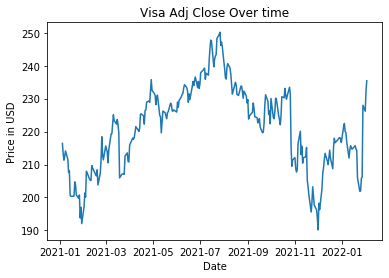

In [185]:
import matplotlib.pyplot as plt
from numpy import round
plt.plot(v_historical['Adj Close'])
plt.title('Visa Adj Close Over time')
print("Last Price of V: "+ str(round(v_historical['Adj Close'][-1],2)))
plt.xlabel("Date")
plt.ylabel('Price in USD')

(c) Use past data to estimate a possible value for the factors u and d in the model seen
in class for the stock for a 1-year period. (There is no "right" way to do this for
this model. Use your best judgment to reach a decision.)

In [177]:
v_calls[v_calls['strike'].between(200,275)]
price_range = v_historical['Adj Close'].max() - v_historical['Adj Close'].min()
price_vol = v_historical['Adj Close'].std()
price_median = v_historical['Adj Close'].median()
print(f'Price range: {np.round(price_range,2)}, Price Vol: {np.round(price_vol,2)}, Price: Median: {np.round(price_median,2)}')
p_u = 270
p_d = 200
print('u factor is 1.1')
print('d factor is .89')

Price range: 59.99, Price Vol: 12.64, Price: Median: 222.36
u factor is 1.1
d factor is .89


(d) Use your values of u and d found in (c), as well as a risk-neutral rate r, to calculate
the price of a call option of your choice and compare with the actual price. Comment
on the quality of your result.

In [125]:
import numpy as np
r = yf.download('^tnx',start='2022-02-03')
r = np.round(r['Adj Close'][0]/100,4)
print(f'We use the rate (2/3/2022): {r*100} %')
strike = 235


[*********************100%***********************]  1 of 1 completed
We use the rate (2/3/2022): 1.92 %


In [173]:
year_from_now_option = visa.option_chain('2023-01-20')
year_from_now_option_calls = year_from_now_option.calls
year_from_now_option_calls[year_from_now_option_calls['strike'] == strike]
u = v_historical['Adj Close'][-1] * 1.1
d = v_historical['Adj Close'][-1] *.89
phi = 35 / (u-d)
psi = (-phi * d)/(1+r)
v = v_historical['Adj Close'][-1] * phi + psi
print(f'Estimated Value of the option is: {np.round(v,2)}')
year_from_now_option_calls[year_from_now_option_calls['strike'] == strike].loc[:,'lastPrice']

Estimated Value of the option is: 21.13


28    21.94
Name: lastPrice, dtype: float64

We estimated a value of 21.13 dollars and the last price of the option a year from now is 21.94. This is a pretty accurate estimate which is between the bid and the ask of this option expiring on 2023-01-20